# Problem Statement

Car Data-
Here, we will apply k-means clustering for grouping the similar cars in one cluster

In [1]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Cars Data file into Python DataFrame and view top 10 rows.

Get the data from here - https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/

In [61]:
colname = ['mpg','cyl','disp','hp','wt','acc','model_yr','org','car_nm']
car_df = pd.read_excel('cardata.xlsx',names = colname)

In [8]:
car_df.head(10)

,mpg,cyl,disp,hp,wt,acc,model_yr,org,car_nm
0,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
1,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
2,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
3,17.0,8,302.0,140,3449,10.5,70,1,ford torino
4,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
5,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
6,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
7,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
8,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl
9,15.0,8,383.0,170,3563,10.0,70,1,dodge challenger se


# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [35]:
#Printing the shape of dataset; Also no null value to handle.
car_df.info()
car_df.isna().sum()
car_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
mpg         397 non-null float64
cyl         397 non-null int64
disp        397 non-null float64
hp          397 non-null object
wt          397 non-null int64
acc         397 non-null float64
model_yr    397 non-null int64
org         397 non-null int64
car_nm      397 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


(397, 9)

In [29]:
#Performing the descriptive analysis
car_df.corr()

,mpg,cyl,disp,wt,acc,model_yr,org
mpg,1.000000,-0.775412,-0.803972,-0.831558,0.419133,0.578667,0.562894
cyl,-0.775412,1.000000,0.950718,0.896623,-0.503016,-0.344729,-0.561796
disp,-0.803972,0.950718,1.000000,0.932957,-0.542083,-0.367470,-0.608749
wt,-0.831558,0.896623,0.932957,1.000000,-0.416488,-0.305150,-0.580552
acc,0.419133,-0.503016,-0.542083,-0.416488,1.000000,0.284376,0.204102
model_yr,0.578667,-0.344729,-0.367470,-0.305150,0.284376,1.000000,0.178441
org,0.562894,-0.561796,-0.608749,-0.580552,0.204102,0.178441,1.000000


In [31]:
car_df.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,397.0,23.528463,7.820926,9.0,17.5,23.0,29.0,46.6
cyl,397.0,5.448363,1.698329,3.0,4.0,4.0,8.0,8.0
disp,397.0,193.139798,104.244898,68.0,104.0,146.0,262.0,455.0
wt,397.0,2969.080605,847.485218,1613.0,2223.0,2800.0,3609.0,5140.0
acc,397.0,15.577078,2.755326,8.0,13.9,15.5,17.2,24.8
model_yr,397.0,76.025189,3.689922,70.0,73.0,76.0,79.0,82.0
org,397.0,1.574307,0.802549,1.0,1.0,1.0,2.0,3.0


In [32]:
import pandas as pd
from scipy.stats import ttest_1samp, ttest_ind
from statsmodels.stats.power import ttest_power
t_statistic, p_value = ttest_ind(car_df['cyl'], car_df['disp'])
print(t_statistic, p_value)

-35.8696611798658 4.0874801549718175e-168


In [16]:
t_statistic, p_value = ttest_ind(car_df['cyl'], car_df['wt'])
print(t_statistic, p_value)

-69.67653739901066 0.0


In [17]:
t_statistic, p_value = ttest_ind(car_df['disp'], car_df['wt'])
print(t_statistic, p_value)

-64.7757489516297 1.022617e-318


In [20]:
t_statistic, p_value = ttest_ind(car_df['cyl'], car_df['mpg'])
print(t_statistic, p_value)

-45.01242647989639 1.7186216478971835e-220


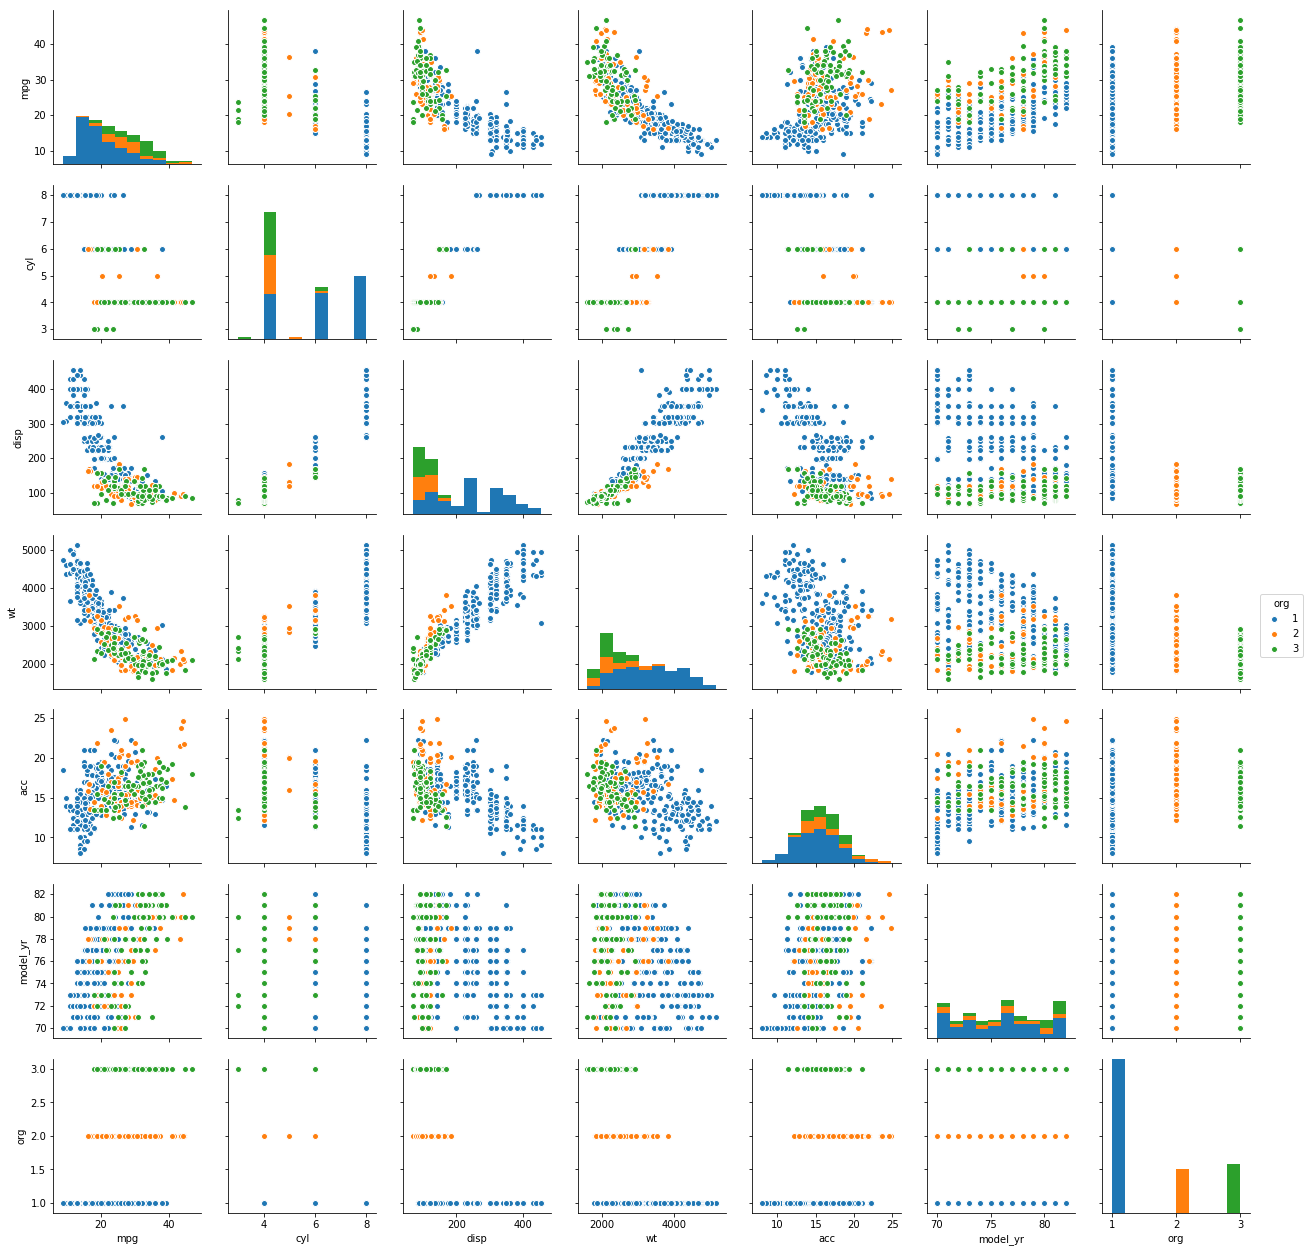

In [33]:
sns.pairplot(car_df,hue="org")

# Q3 Check for missing value check, incorrect data and perform imputation with mean, median, mode as necessary.

In [70]:
#HP is having incorrect data. There are 6 rows with HP as "?". These need to be corrected
car_df['hp'].value_counts()

150    22
90     20
88     19
110    18
100    17
75     14
95     14
67     12
105    12
70     12
65     10
97      9
85      9
230     7
80      7
145     7
140     7
68      6
72      6
84      6
92      6
78      6
71      5
86      5
60      5
170     5
115     5
180     5
175     5
76      4
       ..
167     1
94      1
149     1
61      1
200     1
54      1
208     1
210     1
49      1
220     1
152     1
142     1
148     1
93      1
91      1
103     1
89      1
107     1
108     1
113     1
116     1
122     1
82      1
132     1
133     1
135     1
137     1
77      1
138     1
102     1
Name: hp, Length: 93, dtype: int64

In [65]:
#All incorrect values of HP has higher values for weight. Hence instaed of putting the average value of HP, I am
# replacing with Max value of HP
car_df['hp'] = car_df['hp'].replace('?',0)

In [69]:
car_df['hp'] = car_df['hp'].replace(0,car_df['hp'].max())

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences

In [ ]:
#Performed above

In [72]:
#Observations
#1. no missing value found
#2. T-test reveals that each independant varibales are necessary
#3. Standard deviation of Weight and displacmeent is very high. This shows that there are few outliers due to which
#   SD is so high for these two columns. However we will retain them as of now to check the performance
#4. Scatter plot shows that there are three groups of data.

# Q5. Perform any feature engineering/transformation and remove any duplicate or irrelevant columns

In [1]:
# Further dig into data shows max mpd is for 4 cylinders vehicles
# Origin as pointed earlier indicates production point so should be broken into dummy variables
# Year would be more effective if we can transorm this to calculate age of vehicle. This dataset was used in 1983 so we would 
         #subtract year from 83 to get the age

In [71]:
#Adding new col. as age. We can drop model_yr from the data frame
car_df['age'] = 83 - car_df['model_yr']

In [72]:
#Dropping Model year as we already calculated age. also dropping car name as it doesn't add any value.
car_df = car_df.drop(['model_yr','car_nm'],axis=1)

# Q6. Create new data frame with standardize variables and imputation for any missing/outliers

In [73]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 8 columns):
mpg     397 non-null float64
cyl     397 non-null int64
disp    397 non-null float64
hp      397 non-null int64
wt      397 non-null int64
acc     397 non-null float64
org     397 non-null int64
age     397 non-null int64
dtypes: float64(3), int64(5)
memory usage: 24.9 KB


In [74]:
car_df1 = car_df.drop(['org'],axis=1)
from scipy.stats import zscore
car_df_z = car_df1.apply(zscore)

# Q7. Create appropriate clusters with the new data set

In [76]:
# Starting with elbow plot to determine the number of cluster. based on decriptive analysis, we should have three
# clusters
distortion = []
cluster_range = range( 1, 10)
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(car_df_z)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  distortion.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": distortion } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,2779.000000
1,2,1344.651881
2,3,1003.297201
3,4,795.921279
4,5,720.800251
5,6,653.281404
6,7,599.537593
7,8,556.954548
8,9,511.185171


# Q8. Identify the appropriate clusters with result from above question

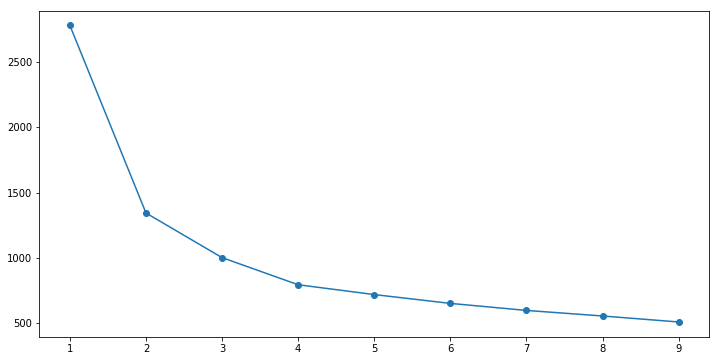

In [77]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [ ]:
# From the ablove elbow graph its pretty evident that we can have 2-4 clusters.

# Q9. Check for no of values in each cluster and centers for each variables. 

In [78]:
car_cluster = KMeans( n_clusters = 3, random_state = 1234 )
car_cluster.fit(car_df_z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1234, tol=0.0001, verbose=0)

In [80]:
#This is the division in the original dataset
car_df['org'].value_counts()

1    248
3     79
2     70
Name: org, dtype: int64

# Q10. Assign the groups created above to data frame and study the characteristics  for each group.

In [86]:
car_df['k_2'] = car_cluster.predict(car_df_z)

In [88]:
car_df['k_2'].value_counts()

0    203
2    100
1     94
Name: k_2, dtype: int64

In [91]:
car_df['k_2']= car_df['k_2'].replace({0,1,2},{1,2,3})

In [92]:
car_df

,mpg,cyl,disp,hp,wt,acc,org,age,k_2
0,15.0,8,350.0,165,3693,11.5,1,13,2
1,18.0,8,318.0,150,3436,11.0,1,13,2
2,16.0,8,304.0,150,3433,12.0,1,13,2
3,17.0,8,302.0,140,3449,10.5,1,13,2
4,15.0,8,429.0,198,4341,10.0,1,13,2
5,14.0,8,454.0,220,4354,9.0,1,13,2
6,14.0,8,440.0,215,4312,8.5,1,13,2
7,14.0,8,455.0,225,4425,10.0,1,13,2
8,15.0,8,390.0,190,3850,8.5,1,13,2
9,15.0,8,383.0,170,3563,10.0,1,13,2


In [96]:
# Export the data into csv for any further analysis

from pandas import ExcelWriter
writer = ExcelWriter('d:\groups.xls')
cars_df.to_excel(writer,'Sheet1')
writer.save()

In [97]:
# We can try similar analysis for 3 grps as well to check if we get more clear distinction among groups

In [ ]:
#Grouping is done very close. Results look good.